<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string
from bs4 import BeautifulSoup
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import squarify
import pandas as pd
import numpy as np
import spacy
nlp = spacy.load("en_core_web_lg")

In [2]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [3]:
#pd.read_csv('job_listings.csv')
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## 2) Use Spacy to tokenize / clean the listings 

In [4]:
df = pd.read_csv("data/job_listings.csv", index_col=0)
df.head()

#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [5]:
def html_strip(text):
    soup = BeautifulSoup(text, 'html.parser')
    stripped_text = soup.get_text(separator=" ")
    return stripped_text
    
    


In [6]:
df['description'] = df['description'].str.lower()

In [7]:
df['clean_description'] = df['description'].apply(html_strip).str.replace(r'\\(x|n)[a-z0-9]{0,2}', ' ')
df.head()

,description,title,clean_description
0,"b""<div><div>job requirements:</div><ul><li><p>...",Data scientist,"b"" job requirements: nceptual understanding i..."
1,b'<div>job description<br/>\n<br/>\n<p>as a da...,Data Scientist I,"b' job description as a data scientist 1, ..."
2,b'<div><p>as a data scientist you will be work...,Data Scientist - Entry Level,b' as a data scientist you will be working on ...
3,"b'<div class=""jobsearch-jobmetadataheader icl-...",Data Scientist,"b' $4,969 - $6,756 a month contract under the ..."
4,b'<ul><li>location: usa \xe2\x80\x93 multiple ...,Data Scientist,b' location: usa multiple locations 2+ y...


In [8]:
STOP_WORDS = nlp.Defaults.stop_words.union(['\\n#li-ms1"',"\\nwe\\'re",'it\\xe2\\x80\\x99s','\\nwe\\’re',
                                            'we\\xe2\\x80\\x99re','customers\\xe2\\x80\\x99','members\\xe2\\x80\\x99',
                                            '\\nall','\\nwe\\xe2\\x80\\x99re','\\nmaster\\xe2\\x80\\x99s','for\\xe2\\x80\\xa6',
                                            'life\\xe2\\x80\\xa6','nai\\xc2\\xa8ve','   ',' ','        ',
                                            '\\n''-',"b'",'b"', "it's",' \xe2\x80\x93',"i'm",'1','come',' :',
                                            '  ','','\n',' \xe2\x80\x93',"i've",'b"everytown.', ' \n','r&amp;D',
                                            'b"nfosys\xe2\x80\x93','we\xe2\x80\x99re','b',','])

In [9]:
def lem(text):
    lemmas=[]
    new_text=nlp(text)
    for token in new_text:
        if((token.text not in STOP_WORDS) and (token.pos!='PRON') and (token.is_punct==False)):
            lemmas.append(token.lemma_)

    return lemmas
df['token'] = df.clean_description.apply(lem)

In [10]:
df.head()

,description,title,clean_description,token
0,"b""<div><div>job requirements:</div><ul><li><p>...",Data scientist,"b"" job requirements: nceptual understanding i...","[job, requirement, nceptual, understanding, ma..."
1,b'<div>job description<br/>\n<br/>\n<p>as a da...,Data Scientist I,"b' job description as a data scientist 1, ...","[job, description, , data, scientist, help..."
2,b'<div><p>as a data scientist you will be work...,Data Scientist - Entry Level,b' as a data scientist you will be working on ...,"[data, scientist, work, consult, business, res..."
3,"b'<div class=""jobsearch-jobmetadataheader icl-...",Data Scientist,"b' $4,969 - $6,756 a month contract under the ...","[$, 4,969, $, 6,756, month, contract, general,..."
4,b'<ul><li>location: usa \xe2\x80\x93 multiple ...,Data Scientist,b' location: usa multiple locations 2+ y...,"[location, usa, , multiple, location, 2, +..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [11]:
df.head()

,description,title,clean_description,token
0,"b""<div><div>job requirements:</div><ul><li><p>...",Data scientist,"b"" job requirements: nceptual understanding i...","[job, requirement, nceptual, understanding, ma..."
1,b'<div>job description<br/>\n<br/>\n<p>as a da...,Data Scientist I,"b' job description as a data scientist 1, ...","[job, description, , data, scientist, help..."
2,b'<div><p>as a data scientist you will be work...,Data Scientist - Entry Level,b' as a data scientist you will be working on ...,"[data, scientist, work, consult, business, res..."
3,"b'<div class=""jobsearch-jobmetadataheader icl-...",Data Scientist,"b' $4,969 - $6,756 a month contract under the ...","[$, 4,969, $, 6,756, month, contract, general,..."
4,b'<ul><li>location: usa \xe2\x80\x93 multiple ...,Data Scientist,b' location: usa multiple locations 2+ y...,"[location, usa, , multiple, location, 2, +..."


In [12]:
from sklearn.feature_extraction.text import CountVectorizer # IMPORT
data = list(df.clean_description)#list of text doc
vect = CountVectorizer(stop_words=STOP_WORDS, min_df=.05, max_df=.9) # create the transformer # INSTANTIATE
vect.fit(data) # build the vocab here it needs to learn the column names # FIT
dtm=vect.transform(data)  # transform the text # TRANSFORM
### FEATURE EXTRACTION 

/Users/alxander44/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amp', 'customers', 'everytown', 'li', 'life', 'll', 'members', 'ms1', 'nai', 'nall', 'nfosysâ', 'nmaster', 'nwe', 've', 'weâ', 'x80', 'x99', 'x99re', 'x99s', 'xa6', 'xa8ve', 'xc2', 'xe2'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


dtm = Document Term Matrix
Sparse Matrix is an effeciance of data storage 
However Sparse Matrixes dont play well with most ML models this is the reason why we turn it in to a todense 

In [13]:
print(dtm[0,6]) # Sparse Matrix

2


In [14]:
dtm.todense() # todense

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [2, 0, 0, ..., 2, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 2, 0]])

In [15]:
dtm1 = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names()) # when ever you are put dtm in a pd df make sure to always use a dense matrix 
dtm1.head() # get the word count for each document

,000,10,100,2019,40,abilities,ability,able,academic,access,...,workplace,works,world,write,writing,written,www,year,years,york
0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,2,0,2,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


/Users/alxander44/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


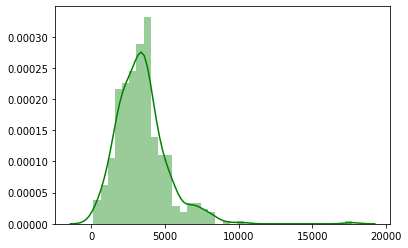

In [16]:
doc_len = [len(doc) for doc in data]
import seaborn as sns 
sns.distplot(doc_len,color='g');

TF- IDF

TF
- This counts how many times a particular word or pharse aparts in a document. 

IDF
- This part devalues words that happen to many times. This comes in the case of stop_words or spam content. 

In [23]:
def tokenizer(document):
    doc = nlp(document)
    return [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)]

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(tokenizer=tokenizer, min_df=.025, max_df=.95, ngram_range=(1,2))
dtm = tfidf.fit_transform(data) # combined the fit and transform method to one here to shorten the process
dtm2 =pd.DataFrame(dtm.todense(), columns= tfidf.get_feature_names())
dtm2.head()

,,,,,,,,,experience,look,...,year,year experience,year hand,year industry,year professional,year relevant,year work,york,york city,you\'ll
0,0.109995,0.187714,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.483919,0.129037,0.030172,0.118145,0.0,0.0,0.0,0.0,0.0,0.053762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.208712,0.000000,0.041642,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.082899,0.047157,0.055133,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.248622,0.000000,0.081299,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4) Visualize the most common word counts

In [24]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')
wc = count(df['token'])

In [26]:
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
3,datum,415,3379,1.0,0.024764,0.024764,0.974178
65,experience,402,1687,2.0,0.012364,0.037128,0.943662
9,work,377,1544,3.0,0.011316,0.048443,0.884977
205,team,367,1373,4.0,0.010062,0.058506,0.861502
199,business,325,1262,5.0,0.009249,0.067755,0.762911
317,data,351,1070,6.0,0.007842,0.075597,0.823944
66,science,342,986,7.0,0.007226,0.082823,0.802817
158,product,276,891,8.0,0.006530,0.089353,0.647887
360,analytic,264,842,9.0,0.006171,0.095524,0.619718
68,model,282,832,10.0,0.006098,0.101621,0.661972


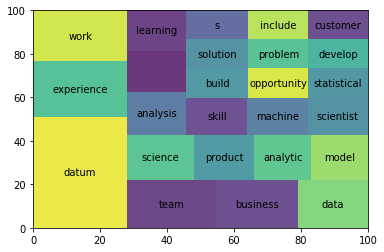

In [36]:
squarify.plot(sizes=wc.iloc[:25]['pct_total'],label=wc.word, alpha=.8);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [37]:
dtm2.head()

,,,,,,,,,experience,look,...,year,year experience,year hand,year industry,year professional,year relevant,year work,york,york city,you\'ll
0,0.109995,0.187714,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.483919,0.129037,0.030172,0.118145,0.0,0.0,0.0,0.0,0.0,0.053762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.208712,0.000000,0.041642,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.082899,0.047157,0.055133,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.248622,0.000000,0.081299,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [40]:
from sklearn.neighbors import NearestNeighbors
# Fit on TF-IDF
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm2)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [41]:
# so now we query using kneighbors
nn.kneighbors([dtm2.iloc[300]])

(array([[0.        , 1.14223957, 1.14953523, 1.15069032, 1.15645427]]),
 array([[300, 251, 397, 331, 130]]))

In [46]:
data[200][:300] # ha,haaaaa would love to work at zillow. 

"b' about the team  llow is looking for an extraordinary data scientist to join a growing team. zillow is on a mission to give consumers certainty and control when selling their home. in particular, using our unparalleled data, and view into housing markets, to help build a world-class platform for r"

In [49]:
# dream job example 
dream_job =["You would now be set on an exciting adventure in the vase world of Machine Learning. Your job if you choose to accept is to create and implament ML Models that will help fight world hungry and end proverty across the word. This message will self-destruct in 5.., 4.., 3.., 2.., 1..,"]
new_job = tfidf.transform(dream_job)
job= nn.kneighbors(new_job.todense())
job

(array([[1.29016474, 1.30552627, 1.31823895, 1.31969762, 1.32052299]]),
 array([[336, 247, 283, 273, 145]]))

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 